<a href="https://colab.research.google.com/github/katzjeff/scaps_1d_simu_plots/blob/main/Final_Jsc_Voc_Curve_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SCAPS 1D Simulation Plots**

## ***Short Circuit Current (Jsc) Vs Open Circuit Voltage(Voc) Plot***

Saving pce_1.csv to pce_1 (33).csv


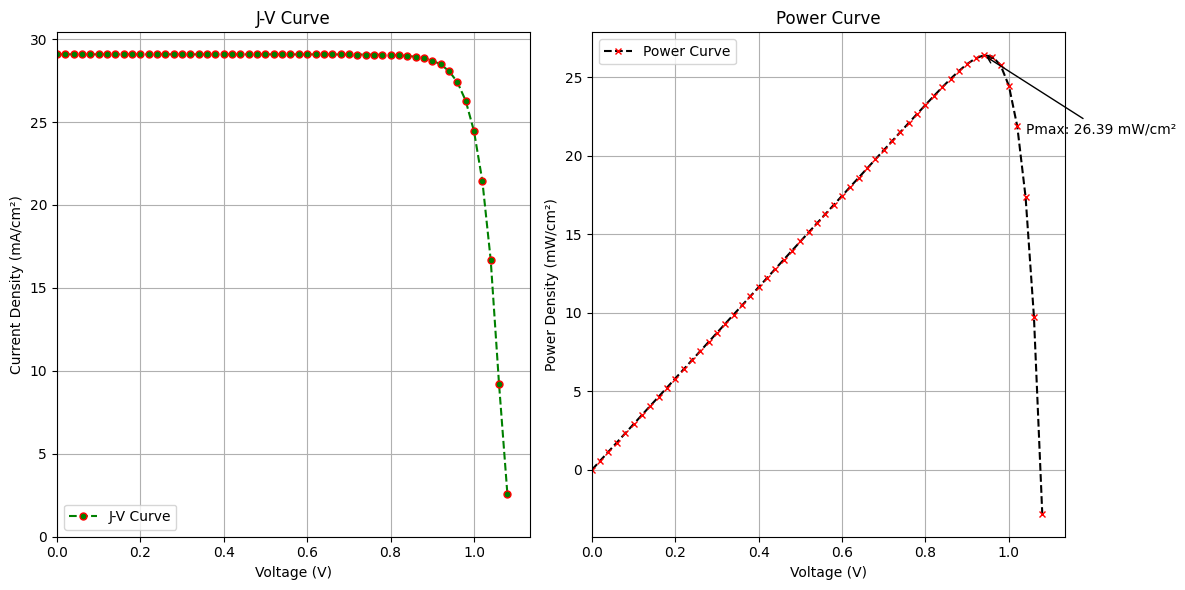

Original Jsc: 29.084 mA/cm²
Original Voc: 1.076 V
Fill Factor (FF): 84.368%
Power Conversion Efficiency (PCE): 26.393%


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming only one file is uploaded
filename = list(uploaded.keys())[0]

# Load the data
data = pd.read_csv(filename)

# Assuming the CSV has columns named 'Voltage' and 'Current'
voltage = data['voltage']
current = data['current']

# Calculate original Jsc
Jsc_original = current.max()

# Find Voc where the current crosses the x-axis (i.e., current is zero)
# Using interpolation to find a more accurate Voc
Voc_original = np.interp(0, current[::-1], voltage[::-1])

# Convert current to absolute values for plotting J-V curve
current_plot = current.abs()
Jsc_plot = current_plot.max()
Voc_plot = voltage[current_plot.idxmax()]

# Calculate Power using original current values
power = voltage * current

# Calculate Maximum Power Point (MPP)
Pmax = max(power)
Vmp = voltage[power.idxmax()]
Imp = current[power.idxmax()]

# Fill Factor (FF) using original values
FF = ((Vmp * Imp) / (Voc_original * Jsc_original)) * 100

# Power Conversion Efficiency (PCE)
# Assuming incident power in mW/cm^2 (usually 100 mW/cm^2 for standard AM1.5G illumination)
incident_power = 100
PCE = (Pmax / incident_power) * 100

# Plot Jsc and Voc Curves using absolute values
plt.figure(figsize=(12, 6))

# J-V Curve
plt.subplot(1, 2, 1)
plt.plot(voltage, current_plot,linestyle='dashed',color='green',marker='o',markeredgecolor='red',markersize=5, label=f'J-V Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm²)')
plt.title('J-V Curve')
plt.legend()
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts at 0
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

# Power Curve
plt.subplot(1, 2, 2)
plt.plot(voltage, power,linestyle='dashed',color='black',marker='x',markeredgecolor='red',markersize=5, label=f'Power Curve')
plt.xlabel('Voltage (V)')
plt.ylabel('Power Density (mW/cm²)')
plt.title('Power Curve')
plt.grid(True)
plt.legend()
plt.xlim(left=0)  # Ensure x-axis starts at 0

# Annotate Pmax point on the Power Curve
plt.annotate(f'Pmax: {Pmax:.2f} mW/cm²', xy=(Vmp, Pmax), xytext=(Vmp + 0.1, Pmax - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='left')

plt.tight_layout()
plt.show()

print(f"Original Jsc: {Jsc_original:.3f} mA/cm²")
print(f"Original Voc: {Voc_original:.3f} V")
print(f"Fill Factor (FF): {FF:.3f}%")
print(f"Power Conversion Efficiency (PCE): {PCE:.3f}%")

# **Jsc-Voc Vs Power Curves**

Saving pce_1.csv to pce_1 (34).csv


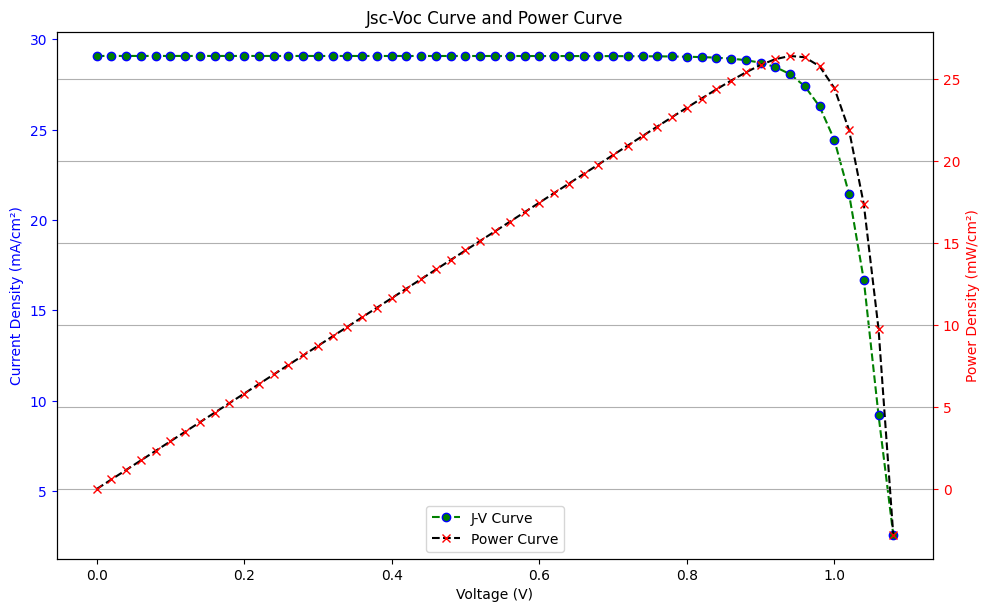

Original Jsc: 29.084 mA/cm²
Original Voc: 1.076 V
Fill Factor (FF): 84.368%
Power Conversion Efficiency (PCE): 26.393%


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from matplotlib.legend_handler import HandlerLine2D

# Upload the file
uploaded = files.upload()

# Assuming only one file is uploaded
filename = list(uploaded.keys())[0]

# Load the data
data = pd.read_csv(filename)

# Assuming the CSV has columns named 'Voltage' and 'Current'
voltage = data['voltage']
current = data['current']

# Calculate original Jsc
Jsc_original = current.max()

# Find Voc where the current crosses the x-axis (i.e., current is zero)
# Using interpolation to find a more accurate Voc
Voc_original = np.interp(0, current[::-1], voltage[::-1])

# Convert current to absolute values for plotting J-V curve
current_plot = current.abs()
Jsc_plot = current_plot.max()
Voc_plot = voltage[current_plot.idxmax()]

# Calculate Power using original current values
power = voltage * current

# Calculate Maximum Power Point (MPP)
Pmax = max(power)
Vmp = voltage[power.idxmax()]
Imp = current[power.idxmax()]

# Fill Factor (FF) using original values
FF = ((Vmp * Imp) / (Voc_original * Jsc_original))*100

# Power Conversion Efficiency (PCE)
# Assuming incident power in mW/cm^2 (usually 100 mW/cm^2 for standard AM1.5G illumination)
incident_power = 100
PCE = (Pmax / incident_power) * 100

# Plot J-V Curve and Power Curve on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot J-V curve
ax1.plot(voltage, current_plot,linestyle='dashed',color='green',marker='o',markeredgecolor='blue', label=f'J-V Curve')
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Current Density (mA/cm²)', color='b')
ax1.tick_params('y', colors='b')

# Add a second y-axis for the power curve
ax2 = ax1.twinx()
ax2.plot(voltage, power,linestyle='dashed',color='black',marker='x',markeredgecolor='red', label=f'Power Curve')
ax2.set_ylabel('Power Density (mW/cm²)', color='r')
ax2.tick_params('y', colors='r')

"""
# Annotate Pmax point on the Power Curve
ax2.annotate(f'Pmax: {Pmax:.2f}\n mW/cm²', xy=(Vmp, Pmax), xytext=(Vmp + 0.1, Pmax - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='left')
"""

# Add legends to the graph
# Adding legends
fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.5,0), bbox_transform=ax1.transAxes)

plt.title('Jsc-Voc Curve and Power Curve')
plt.grid(True)
plt.show()

print(f"Original Jsc: {Jsc_original:.3f} mA/cm²")
print(f"Original Voc: {Voc_original:.3f} V")
print(f"Fill Factor (FF): {FF:.3f}%")
print(f"Power Conversion Efficiency (PCE): {PCE:.3f}%")


# VASP Modelling Plots

## ***Density of States Plots***

In [ ]:
import pandas as pd